In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from custum_dataset1 import Datadata


transform = transforms.Compose([transforms.ToTensor(),nn.Flatten()]) 

mnist_train = Datadata(root='./data', train=True, transform=transform)

mnist_test = Datadata(root='./data', train=False, transform=transform)

train_dataloader = DataLoader(mnist_train,batch_size=124,shuffle=True)   
test_dataloader = DataLoader(mnist_test,batch_size=1,shuffle=False) 



type:<class 'tuple'>, data:torch.Size([1, 784]), label:5
最大値:1.0, 最小値:0.0


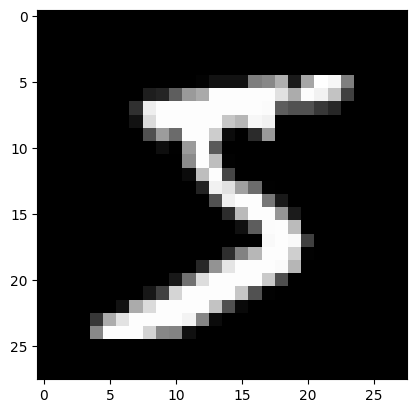

In [17]:
import matplotlib.pyplot as plt

_ = mnist_train[0]
print(f'type:{type(_)}, data:{_[0].shape}, label:{_[1]}')
print(f'最大値:{_[0].max()}, 最小値:{_[0].min()}')
plt.imshow(_[0].reshape(28, 28), cmap='gray')


In [18]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 200) 
        self.l2 = nn.Linear(200, 784)

    def forward(self, x):
        h = self.l1(x)   
        h = torch.relu(h)  

        h = self.l2(h)      
        y = torch.sigmoid(h) 
        return y

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

import torch.optim as optimizers

model = Autoencoder().to(device) 
criterion = nn.BCELoss() 
optimizer = optimizers.Adam(model.parameters()) 

cpu


In [19]:


epochs = 10 


for epoch in range(epochs):
    train_loss = 0.
    
    for (x, _) in train_dataloader:
        x = x.to(device) 
        model.train()    
        preds = model(x) 
        loss = criterion(preds, x) 
        optimizer.zero_grad()    
        loss.backward()  
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    
    print('Epoch({}) -- Loss: {:.3f}'.format(
        epoch+1,
        train_loss
    ))

Epoch(1) -- Loss: 0.165
Epoch(2) -- Loss: 0.092
Epoch(3) -- Loss: 0.078
Epoch(4) -- Loss: 0.073
Epoch(5) -- Loss: 0.070
Epoch(6) -- Loss: 0.069
Epoch(7) -- Loss: 0.068
Epoch(8) -- Loss: 0.067
Epoch(9) -- Loss: 0.067
Epoch(10) -- Loss: 0.066
CPU times: user 31 s, sys: 6.48 s, total: 37.5 s
Wall time: 29 s


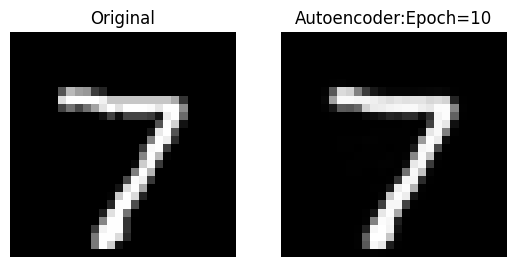

In [20]:
import matplotlib.pyplot as plt

_x, _ = next(iter(test_dataloader))
_x = _x.to(device)

model.eval() 
x_rec = model(_x)

titles = {0: 'Original', 1: 'Autoencoder:Epoch=10'}
for i, image in enumerate([_x, x_rec]):
    image = image.view(28, 28).detach().cpu().numpy()
    plt.subplot(1, 2, i+1)
    plt.imshow(image, cmap='binary_r')
    plt.axis('off'), plt.title(titles[i])
plt.show()

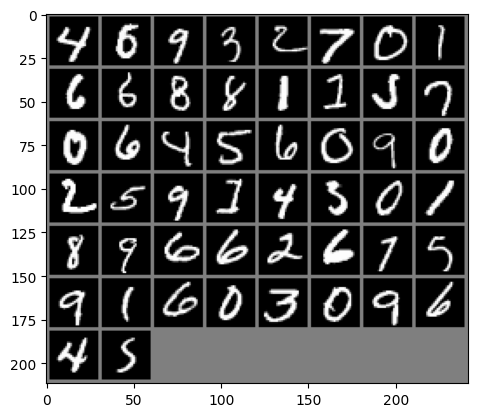

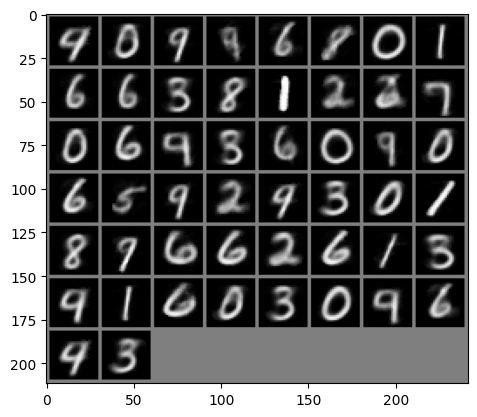

In [13]:
output, org = output_and_label[-1]
imshow(org.reshape(-1, 1, 28, 28))
imshow(output.reshape(-1, 1, 28, 28))